In [1]:
import numpy as np
import pandas as pd

In [5]:
# load files
train_data = pd.read_csv("train_users_2.csv", encoding="ISO-8859-1")
test_data = pd.read_csv("test_users.csv", encoding="ISO-8859-1")
count_data = pd.read_csv("countries.csv")
sess_data = pd.read_csv("sessions.csv")
a_g_bkt_data= pd.read_csv("sessions.csv")

In [6]:
train_data[:3]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US


In [7]:
test_data[:3]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome


In [8]:
count_data[:3]

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61


In [9]:
sess_data[:3]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301


In [13]:
a_g_bkt_data= pd.read_csv("age_gender_bkts.csv")

In [14]:
a_g_bkt_data[:3]

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1,2015
1,95-99,AU,male,9,2015
2,90-94,AU,male,47,2015


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlin Inline
%matplotlib inline

# Set plot dimensions
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

In [16]:
#Size of Train and Test Datasets
print("There are", train_data.shape[0], "users in the training set and",test_data.shape[0], "in the test set.")
print("Total: ", train_data.shape[0] + test_data.shape[0], "users.")

There are 213451 users in the training set and 62096 in the test set.
Total:  275547 users.


In [18]:
# Merge train and test datasets
total_data = pd.concat((train_data, test_data), axis=0, ignore_index=True)

# Remove ID's since now we are not interested in making predictions
total_data.drop('id',axis=1, inplace=True)

total_data.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


In [19]:
total_data.gender.replace('-unknown-', np.nan, inplace=True)

In [20]:
# Percentage of Missing Data
total_nan = (total_data.isnull().sum() / total_data.shape[0]) * 100
total_nan[total_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

In [21]:
# Missing Data
print("Percentage of  Missing Data:",int((train_data.date_first_booking.isnull().sum() / train_data.shape[0]) * 100), "% of missing values at date_first_booking in the training data")

Percentage of  Missing Data: 58 % of missing values at date_first_booking in the training data


In [22]:
total_data.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [23]:
print(sum(total_data.age > 100))
print(sum(total_data.age < 18))

2690
188


In [24]:
total_data[total_data.age > 100]['age'].describe()

count    2690.000000
mean      690.957249
std       877.927570
min       101.000000
25%       105.000000
50%       105.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [25]:
total_data[total_data.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [26]:
total_data.loc[total_data.age > 95, 'age'] = np.nan
total_data.loc[total_data.age < 13, 'age'] = np.nan

In [27]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    total_data[categorical_feature] = total_data[categorical_feature].astype('category')

In [28]:
total_data['date_account_created'] = pd.to_datetime(total_data['date_account_created'])
total_data['date_first_booking'] = pd.to_datetime(total_data['date_first_booking'])
total_data['date_first_active'] = pd.to_datetime((total_data.timestamp_first_active // 1000000), format='%Y%m%d')

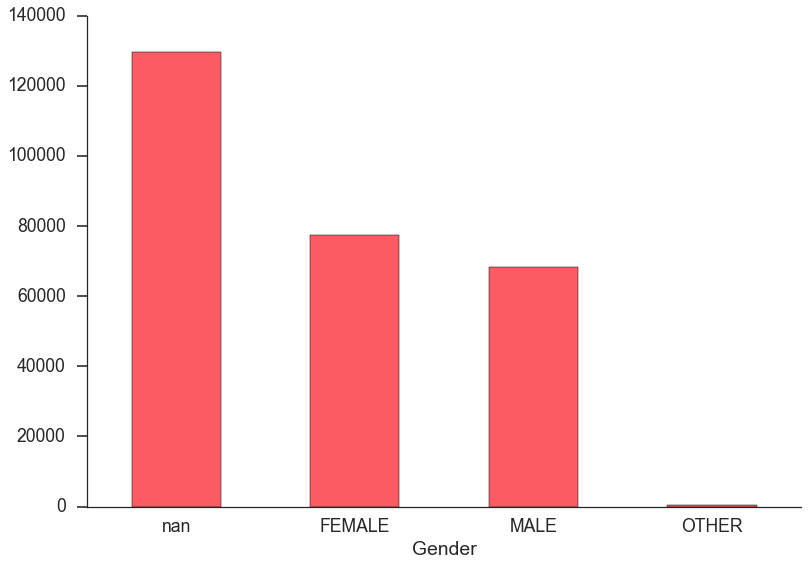

In [29]:
total_data.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()

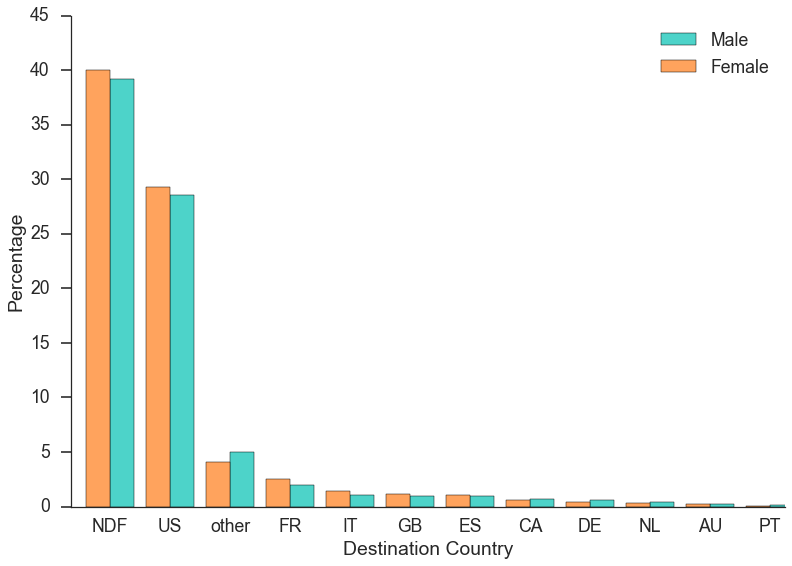

In [30]:
women = sum(total_data['gender'] == 'FEMALE')
men = sum(total_data['gender'] == 'MALE')

female_destinations = total_data.loc[total_data['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = total_data.loc[total_data['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

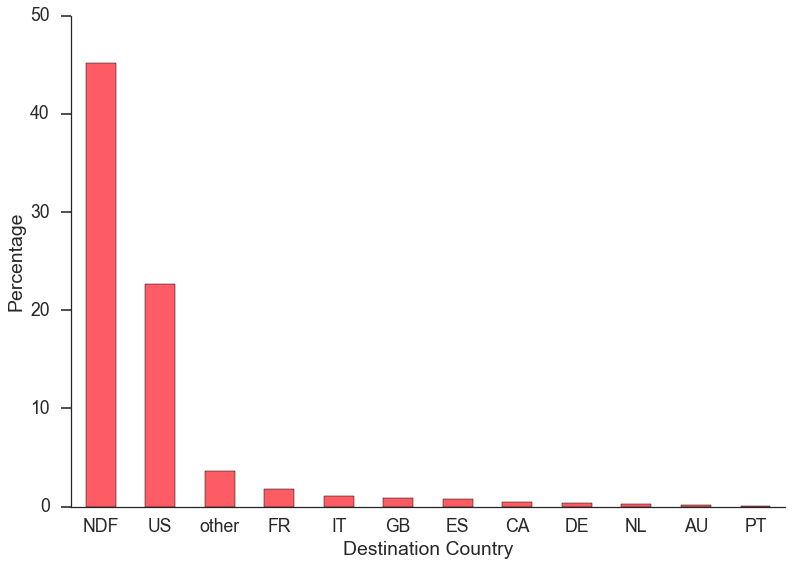

In [31]:
destination_percentage = total_data.country_destination.value_counts() / total_data.shape[0] * 100
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)
# Using seaborn can also be plotted
# sns.countplot(x="country_destination", data=total_data, order=list(total_data.country_destination.value_counts().keys()))
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

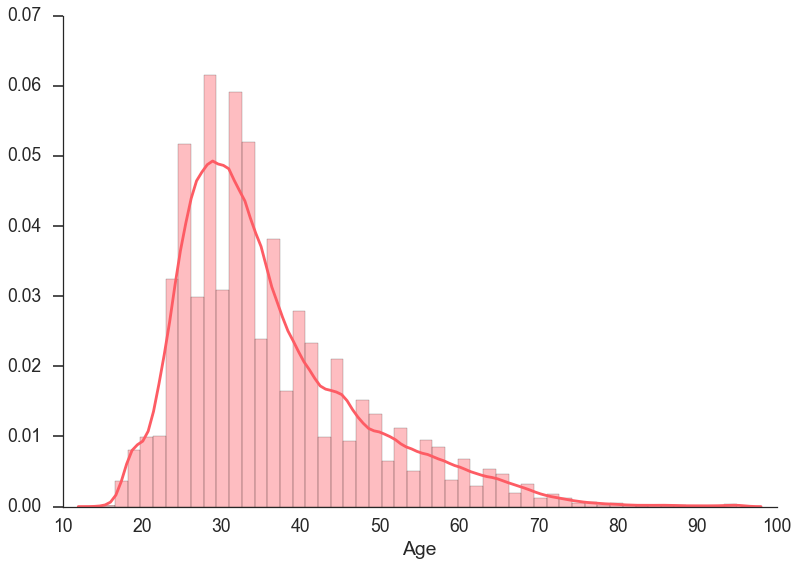

In [32]:
sns.distplot(total_data.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()

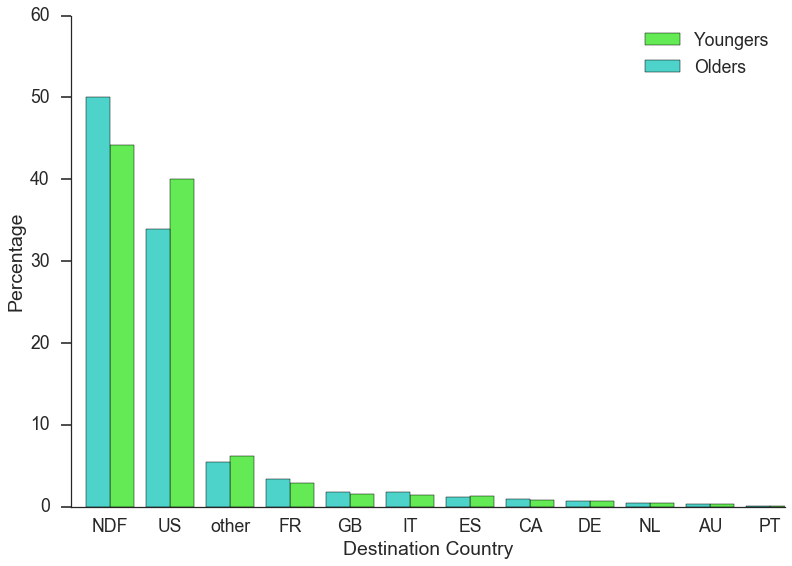

In [33]:
age = 45

younger = sum(total_data.loc[total_data['age'] < age, 'country_destination'].value_counts())
older = sum(total_data.loc[total_data['age'] > age, 'country_destination'].value_counts())

younger_destinations = total_data.loc[total_data['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = total_data.loc[total_data['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [34]:
print((sum(total_data.language == 'en') / total_data.shape[0])*100)

96.3675888324


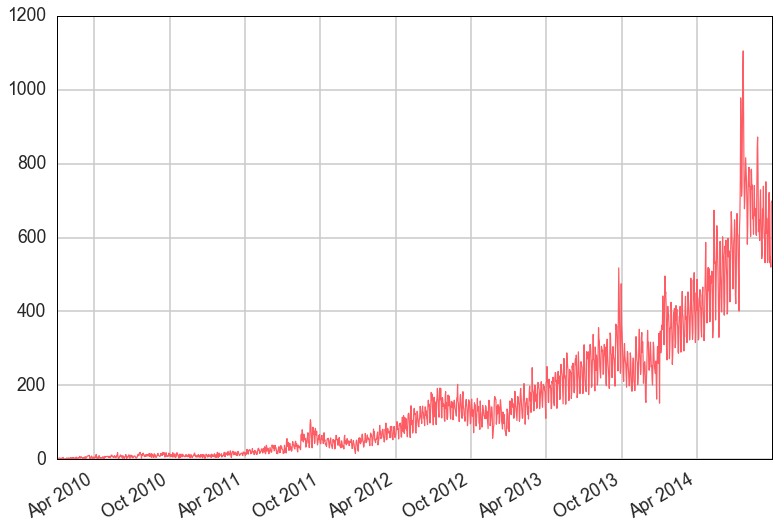

In [35]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
total_data.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

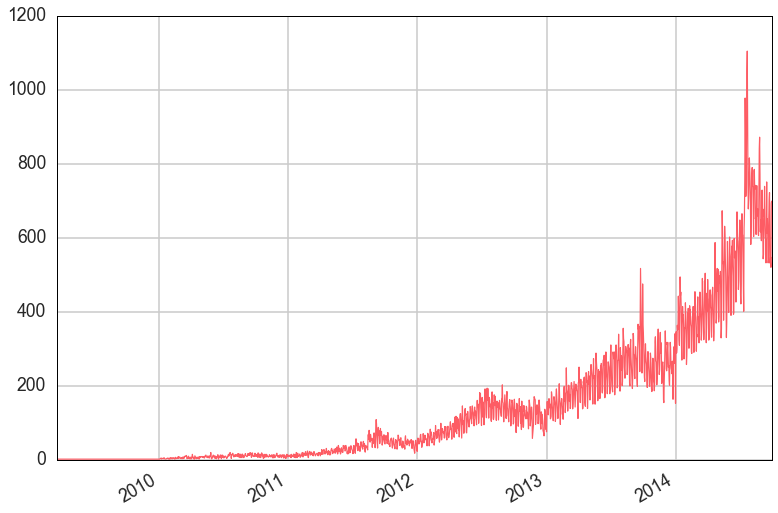

In [36]:
total_data.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

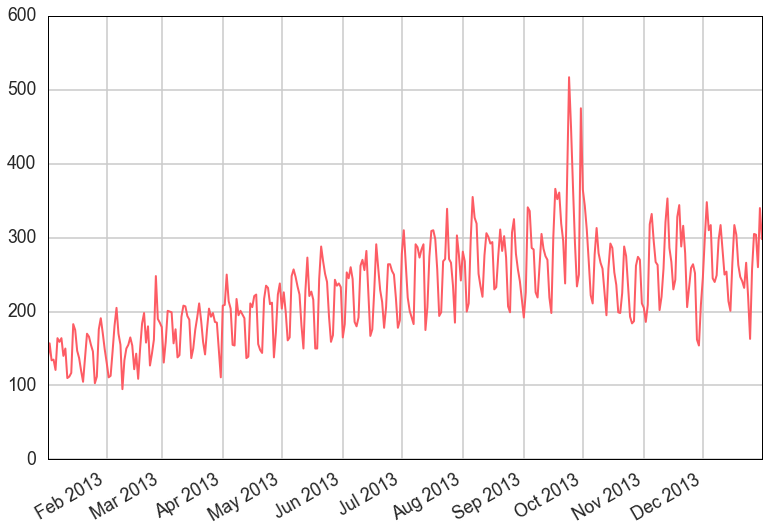

In [37]:
users_2013 = total_data[total_data['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.show()

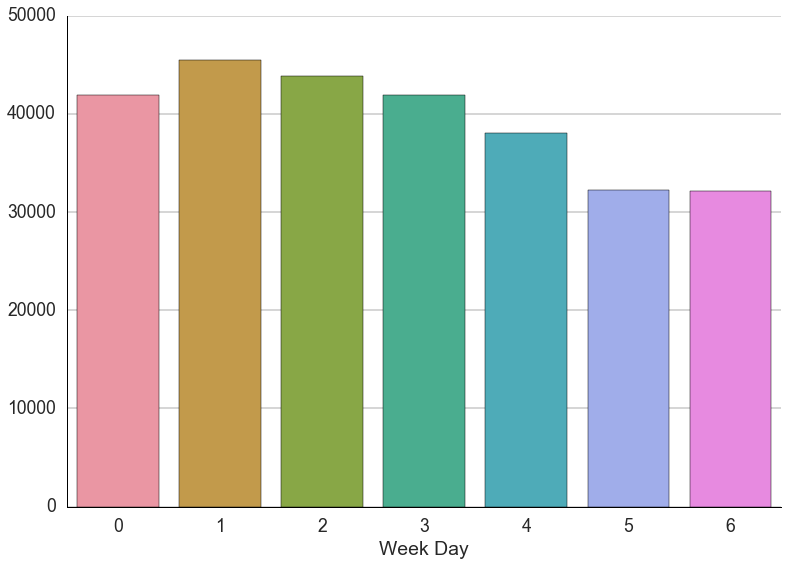

In [38]:
weekdays = []
for date in total_data.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

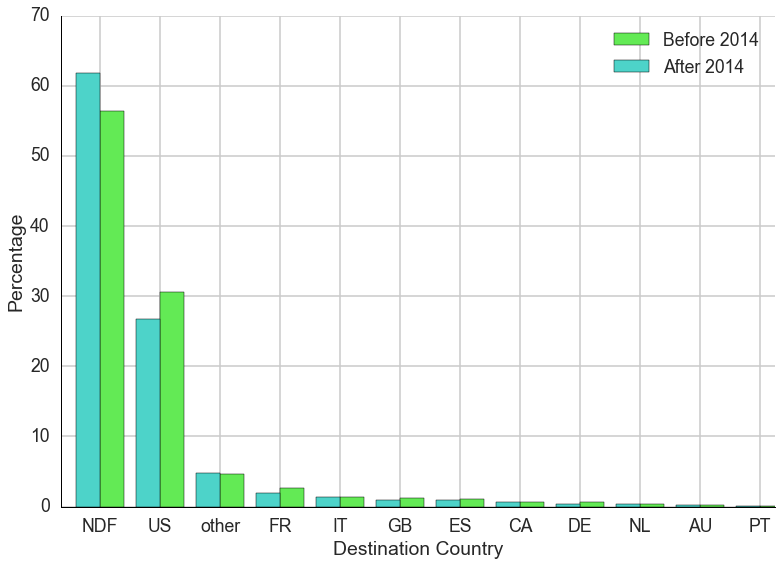

In [39]:
date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(total_data.loc[total_data['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(total_data.loc[total_data['date_first_active'] > date, 'country_destination'].value_counts())
before_destinations = total_data.loc[total_data['date_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = total_data.loc[total_data['date_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100
before_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()